In [1]:
import math
import numpy as npy
import EMfields as em
from math import pi as pi
import matplotlib.pyplot as plt
from scipy import special as sp

def Esqrmod(wl,N2,N,r,theta,phi,a,mu1,isSphere):
    if isSphere:
        E, H = em.sphereEM(wl,N2,N,r,theta,phi,a,mu1)
    else:
        E, H = em.shellEM(wl,N2,N,r,theta,phi,a,mu1)
    return E*npy.conj(E)

def diff_volume(wl,N2,N,r,theta,phi,a,mu1,isSphere):
    Esqr = Esqrmod(wl,N2,N,r,theta,phi,a,mu1,isSphere)
    return Esqr*(r**2)*npy.sin(theta)

def heatpowerDensity(wl,N2,N,r,theta,phi,a,mu1):
    wl /= 1e9
    eps0 = 8.8541878128e-12
    Esqr = Esqrmod(wl,N2,N,r,theta,phi,a,mu1,isSphere)
    return omega*eps0*((N2**2).imag)*Esqr

def powerDensity(wl,N2,N,r,theta,phi,a,mu1):
    wl /= 1e9
    eps0 = 8.8541878128e-12
    Esqr = Esqrmod(wl,N2,N,r,theta,phi,a,mu1,isSphere)
    return omega*eps0*((N2**2).imag)*Esqr

In [2]:
D = 10e-9                                   # Diâmetro do nanobastão (m)
L = 40e-9                                   # Comprimento do nanobastão (m)
cp_Au = 129                                 # Calor específico do ouro (J/kg.K)
k_h2o = 0.6                                 # Condutividade térmica da água (W/m.k)
rho_Au = 19300                              # Densidade do ouro (kg/m^3)
a_eq = (D/2)*((0.5*(3*L/D-1))**(1/3))       # Raio equivalente (m)
tau_d = (a_eq**2)*rho_Au*cp_Au/(3*k_h2o)    # Tempo característico de difusão térmica para o meio (s)

In [3]:
print("Tempo de difusão térmica típico para AuNR 40x10nm --> ~ {} ps".format(npy.round(tau_d*(1e12),1)))

Tempo de difusão térmica típico para AuNR 40x10nm --> ~ 107.7 ps


In [4]:
Vnp = (4*pi*(a_eq**3)/3)    # Volume da NP
Cabs_typical = 1e-15        # Seção de absorção típica para AuNPs
tau_ep = 1.7e-12            # Tempo típico de termalização eletron-fonon
Iavg = 1e8                  # Intensidade média típica do laser
f = 80e6                    # Taxa de repetição de pulsos típicas do laser de fs

In [5]:
t0 = npy.linspace(0,1e-9, num=10000)
T0 = ((Cabs_typical*Iavg)/(rho_Au*Vnp*cp_Au*f*(1-tau_ep/tau_d)))*(npy.exp(-t0/tau_d)-npy.exp(-t0/tau_ep))

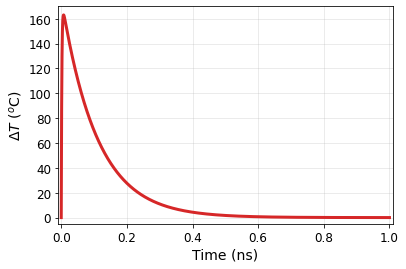

In [6]:
fig1 = plt.figure(1)
ax1 = plt.gca()
plt.plot(t0/(1e-9), T0, 'tab:red', linewidth=3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.rcParams['figure.figsize'] = (10, 5)
plt.ylabel('$\Delta T$ ($^{o}$C)', fontsize=14)
plt.xlabel('Time (ns)', fontsize=14)
plt.xlim([-0.01, 1.01])
plt.ylim([-5, 170])
plt.grid(alpha=0.3)
plt.show()

In [7]:
# Parâmetros materiais
a = 22e-3                           # Altura do líquido na cubeta (m)
b = 1e-3                            # Espessura da líquido na cubeta (m)
l = 10e-3                           # Comprimento do caminho óptico (largura da cubeta - m)
Cabs = 1e-15                        # Seção de absorção típica para nanopartículas de ouro(m ^ 2)
rho_h2o = 1000                      # Densidade do meio (kg/m^3)
cp_h2o = 4200                       # Calor específico do meio (J/kg.K)
Cnp = npy.array([1e14, 1e15, 1e16]) # Concentração da amostra de nanopartículas (m ^ -3)
h = 35                              # Coeficiente de transferência de calor convectivo(W/m ^ 2.K)    # Ref.:
                                    # https://www.engineersedge.com/heat_transfer/convective_heat_transfer_coefficients__13378.htm

# Parâmetros do Laser
Pexc=3.5                            # Potência média do Laser (W)
f=80e6                              # Taxa de repetição do Laser (Hz)

# Parâmetros calculados
S = 2*(a*b + a*l + b*l)             # Somatório das áreas em que há perda convectiva(m ^ 2)
V = a*b*l                           # Volume do líquido na cubeta (m^3)
I = Pexc/(a*b)                      # Intensidade do feixe (W/m^2)
E0 = Cabs*I/f                       # Energia absorvida por uma nanopartícula (J)
E = Cnp*E0                          # Densidade volumétrica de energia absorvida na amostra(J/m ^ 3)
B = h*S/(rho_h2o*cp_h2o*V)          # Fator de perda de calor (1/s)